In [1]:
!unzip food_dataset.zip

Archive:  food_dataset.zip
  inflating: food_dataset/aloo_matar/7e392ca2af.jpg  
  inflating: food_dataset/aloo_matar/14f3ca9153.jpg  
  inflating: food_dataset/aloo_matar/55b1fdc50e.jpg  
  inflating: food_dataset/aloo_matar/34a9630f01.jpg  
  inflating: food_dataset/aloo_matar/02df621fdd.jpg  
  inflating: food_dataset/aloo_matar/11d98db2fe.jpg  
  inflating: food_dataset/aloo_matar/48c588fa18.jpg  
  inflating: food_dataset/aloo_matar/21e56f6d06.jpg  
  inflating: food_dataset/aloo_matar/8fbcf699e6.jpg  
  inflating: food_dataset/aloo_matar/18a5afc696.jpg  
  inflating: food_dataset/aloo_matar/06b47185d9.jpg  
  inflating: food_dataset/aloo_matar/42ad1e8c14.jpg  
  inflating: food_dataset/aloo_matar/8d1b4578e9.jpg  
  inflating: food_dataset/aloo_matar/41cd12677f.jpg  
  inflating: food_dataset/aloo_matar/58c57dc4b2.jpg  
  inflating: food_dataset/aloo_matar/52cb18d1d3.jpg  
  inflating: food_dataset/aloo_matar/9dcac3cc68.jpg  
  inflating: food_dataset/aloo_matar/18c83308e5.jpg  
 

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
import os
import shutil
import random

# Set your dataset directory path
dataset_dir = "/content/food_dataset"

# Create directories for train, validation, and test sets
train_dir = "/content/train"
validation_dir = "/content/validate"
test_dir = "/content/test"

os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)


In [4]:
# Define the split ratio
train_split = 0.7
val_split = 0.15
test_split = 0.15

In [5]:
# Iterate through each folder in the dataset
for folder_name in os.listdir(dataset_dir):
    folder_path = os.path.join(dataset_dir, folder_name)

    # Get list of images in the folder
    images = os.listdir(folder_path)
    random.shuffle(images)  # Shuffle images

    # Calculate split sizes
    num_images = len(images)
    num_train = int(num_images * train_split)
    num_val = int(num_images * val_split)
    num_test = num_images - num_train - num_val

    # Split images
    train_images = images[:num_train]
    val_images = images[num_train:num_train + num_val]
    test_images = images[num_train + num_val:]

    # Move images to respective directories
    for img in train_images:
        src = os.path.join(folder_path, img)
        dst = os.path.join(train_dir, folder_name)
        os.makedirs(dst, exist_ok=True)
        shutil.copy(src, dst)

    for img in val_images:
        src = os.path.join(folder_path, img)
        dst = os.path.join(validation_dir, folder_name)
        os.makedirs(dst, exist_ok=True)
        shutil.copy(src, dst)

    for img in test_images:
        src = os.path.join(folder_path, img)
        dst = os.path.join(test_dir, folder_name)
        os.makedirs(dst, exist_ok=True)
        shutil.copy(src, dst)

print("Dataset split complete.")

Dataset split complete.


In [6]:
img_height, img_width = 224, 224
batch_size = 10

train_ds = tf.keras.utils.image_dataset_from_directory(
    "train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "validate",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    "test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 663 files belonging to 39 classes.
Found 117 files belonging to 39 classes.
Found 195 files belonging to 39 classes.


In [7]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(39, activation="softmax")  # Adjusted for 39 classes
    ]
)


In [8]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [9]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 4
)

Epoch 1/4


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


67/67 [==============================] - 44s 633ms/step - loss: 3.6734 - accuracy: 0.0317 - val_loss: 3.6631 - val_accuracy: 0.0342
Epoch 2/4
67/67 [==============================] - 51s 756ms/step - loss: 3.6331 - accuracy: 0.0468 - val_loss: 3.6250 - val_accuracy: 0.0513
Epoch 3/4
67/67 [==============================] - 43s 639ms/step - loss: 3.5025 - accuracy: 0.0799 - val_loss: 3.4674 - val_accuracy: 0.0855
Epoch 4/4
67/67 [==============================] - 43s 637ms/step - loss: 3.0476 - accuracy: 0.2036 - val_loss: 3.6588 - val_accuracy: 0.0684


In [16]:
model.evaluate(test_ds)

20/20 [==============================] - 7s 343ms/step - loss: 3.7988 - accuracy: 0.0462


[3.798825263977051, 0.04615384712815285]

In [14]:
import os

# Get the class names from the folder names in the train directory
class_names = sorted(os.listdir(train_dir))

# Print the class names to verify
print(class_names)


['Chole_bhatura', 'aloo_matar', 'aloo_tikki', 'barfi', 'bhindi_masala', 'biryani', 'butter_chicken', 'chapati', 'cheesecake', 'chicken_curry', 'chicken_tikka', 'chicken_tikka_masala', 'chocolate_cake', 'club_sandwich', 'dal_makhani', 'french_fries', 'fried_rice', 'gajar_ka_halwa', 'gulab_jamun', 'hamburger', 'ice_cream', 'jalebi', 'kachori', 'kadai_paneer', 'kadhi_pakoda', 'kofta', 'laddu', 'lassi', 'omelette', 'palak_paneer', 'paneer_butter_masala', 'pizza', 'poha', 'rabri', 'ras_malai', 'rasgulla', 'samosa', 'sohan_papdi', 'spring_rolls']


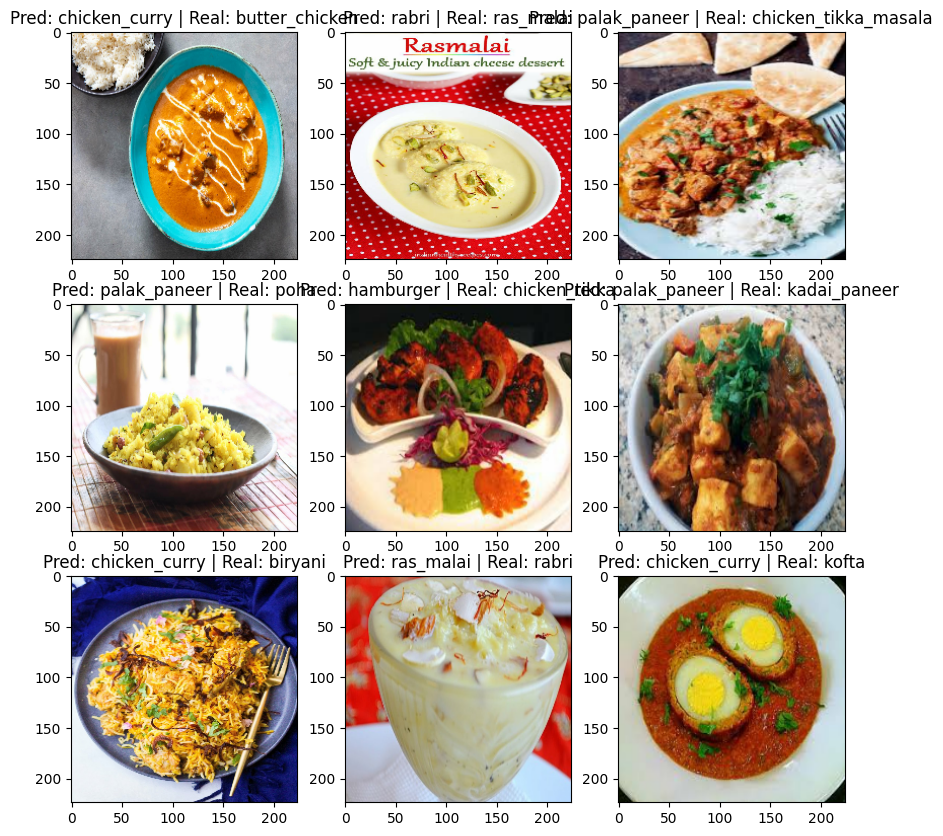

In [15]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
    classifications = model(images)

    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        index = numpy.argmax(classifications[i])
        plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])


In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

### **Pre-Trained Model**

In [12]:
import tensorflow as tf

# Load the TFLite model
tflite_model_path = "/content/model.tflite"
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Prepare test data (replace this with your own test data preparation code)
test_data = train_ds  # Your test data in the appropriate format

# Perform inference
interpreter.set_tensor(input_details[0]['index'], test_data)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])

# Print or process the output (replace this with your own post-processing code)
print(output_data)


ValueError: Cannot set tensor: Got value of type STRING but expected type FLOAT32 for input 0, name: serving_default_rescaling_input:0 